# Tarea 4 
## Ejercicio 2

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt 
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
from math import sqrt
%matplotlib inline

Volvemos a cargar los datos con los que vamos a trabajar, en esta ocasión vamos a tomar todos los datos

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person =70, resize=1)

In [3]:
for name in lfw_people.target_names:
    print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [4]:
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

In [5]:
m=lfw_people.data
m.shape

(1288, 11750)

In [6]:
X.shape

(1288, 11750)

### Ojo al correr esta linea

In [7]:
#X = X[0:1000,:]
#y = y[0:1000]

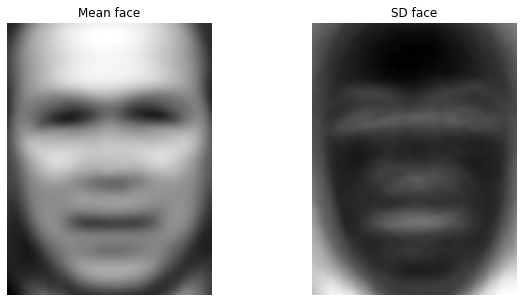

(1288, 11750)

In [8]:
scaler = StandardScaler(with_mean=True,with_std=True)
faces_scale = scaler.fit_transform(X)
mean_face = np.reshape(scaler.mean_, (125,94))
sd_face = np.reshape(np.sqrt(scaler.var_), (125,94))

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(mean_face, cmap=plt.cm.gray), plt.axis('off'), plt.title('Mean face')
plt.subplot(122), plt.imshow(sd_face, cmap=plt.cm.gray), plt.axis('off'), plt.title('SD face')
plt.show()
faces_scale.shape

### Realizamos Kernel PCA

In [43]:
from sklearn.decomposition import KernelPCA # estandarizar y justificar
sigma = 1.5 #0.8
ncomp = 2
# Kernel PCA con nuestros datos de entrenamiento
kpca = KernelPCA(n_components=3, kernel='poly', gamma=1/sigma)#
# rbf - 0.1, 1ya
# sigmoid - 2.5, 1ya
# cosine - 1, 0.5, 2.5
# linear 1.5
# poly 5.5
mesh_kpca = kpca.fit_transform(faces_scale) #X-faces_scale
# ajusto las proyeccions para un grid
#Z = np.reshape(mesh_kpca[:,ncomp],(-1,num)) 

In [44]:
tabla_2 = pd.DataFrame(mesh_kpca)
tabla_2['Nombre'] = target_names[y]
tabla_2.columns = ['kpc1','kpc2','kpc3','Nombre']

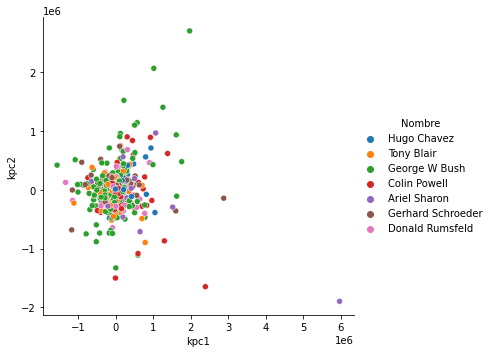

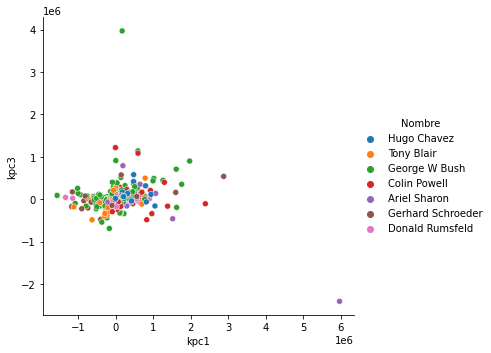

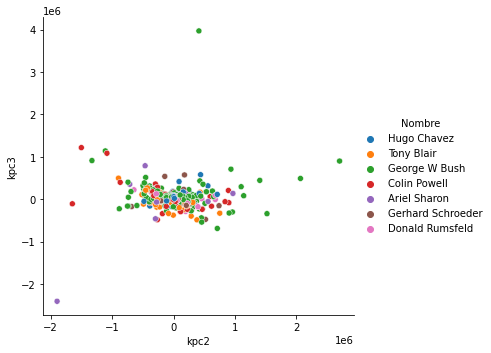

In [45]:
sns.relplot(x='kpc1', y='kpc2', hue='Nombre',data=tabla_2)
sns.relplot(x='kpc1', y='kpc3', hue='Nombre',data=tabla_2)
sns.relplot(x='kpc2', y='kpc3', hue='Nombre',data=tabla_2)

In [4]:
#sns.relplot(x='kpc1', y='kpc2', hue='Nombre',data=tabla_2)

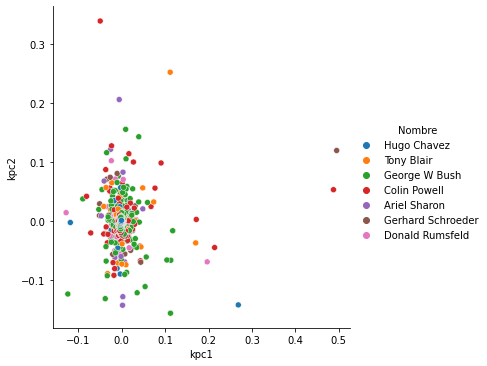

In [12]:
# Ocupamos los datos sin estandarizar, respetando los mismos parametros que nos proporcionaron
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/sigma)#
mesh_kpca = kpca.fit_transform(X) #X-faces_scale

tabla_2 = pd.DataFrame(mesh_kpca)
tabla_2['Nombre'] = target_names[y]
tabla_2.columns = ['kpc1','kpc2','Nombre']
sns.relplot(x='kpc1', y='kpc2', hue='Nombre',data=tabla_2)

### Spectral Embedings

In [46]:
import os
os.chdir('C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_4')
from spectral_clustering import *

In [47]:
def plot_graph(X,knn_graph):    
    # crea los indices
    a, b = np.where(knn_graph>0)
    indices_temp = np.array([a,b]).T
    ix = indices_temp
    for i in range(indices_temp.shape[0]):
        test_elem = indices_temp[i,]
        temp = np.sum(np.isin(indices_temp,test_elem),axis=1)
        ix[temp==2,] = test_elem
        
    indices = np.unique(ix,axis=0)

    data_toy = pd.DataFrame(X)
    data_toy.columns = ['x1','x2']  
    data_toy = pd.DataFrame(data_toy).assign(cl = y)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(x='x1', y='x2', data = data_toy, s=150)
    #for i in range(X.shape[0]):
    #    plt.text(X[i,0], X[i,1]+.1, i)
    
    for i in range(indices.shape[0]):
        coords = np.array([X[indices[i,0],:], X[indices[i,1],:]])
        #sns.lineplot(coords.T[0,], coords.T[1,], color='black',ax=ax)
        plt.plot(coords.T[0,], coords.T[1,], color='black')

In [74]:
# Ocupamos un sigma de 2.5 con 4 vecinos cercanos y un laplaciano 'rw', ya que conocemos el número de grupos que deseamos
# ocupar solo pasamos el dato 
knn = 4 # k-vecinos cercanos para la construcción del grafo
sigma = 2.5 # sigma del Kernel Gaussiano
lflag = 'sym' # Tipo de Laplaciano
kclust = 7

indices, knn_graph = graph(faces_scale,knn,mutual=True)#X
W = adjacency_matrix(faces_scale, knn_graph, sigma, True)#X
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)

In [69]:
#vecs_k

In [70]:
z = pd.DataFrame(y_km, target_names[y])
#z.iloc[:20]

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

sns.set()
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
#np.round(vecs,4)

<AxesSubplot:title={'center':'eigenvector 5'}, xlabel='x1', ylabel='x2'>

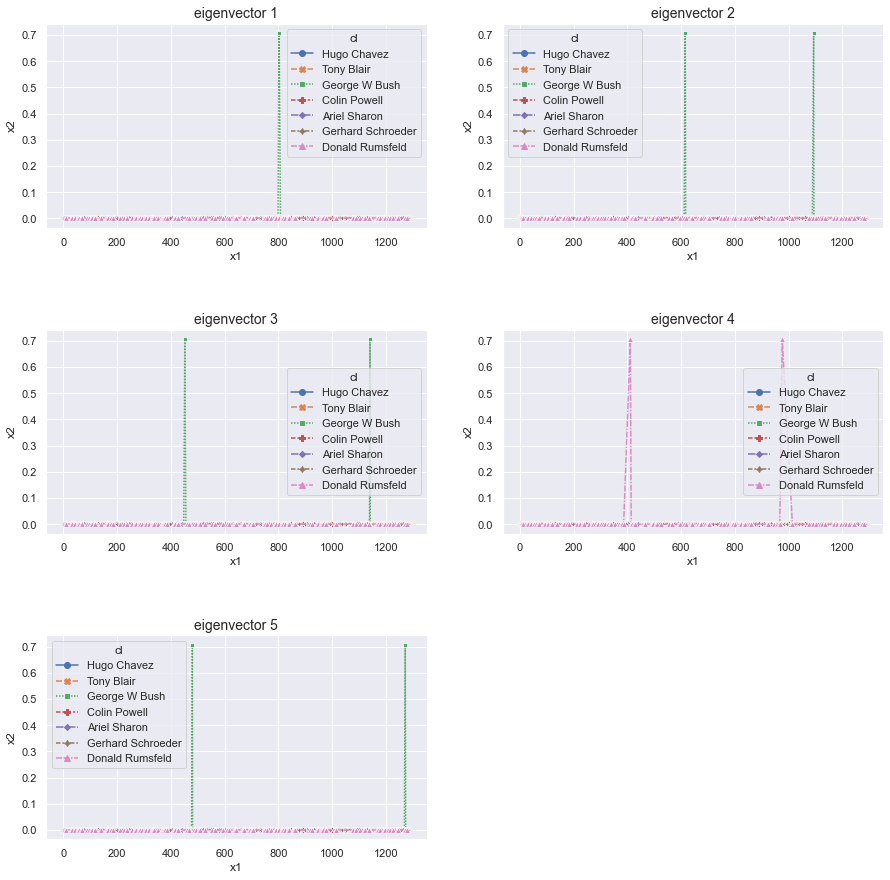

In [73]:
nv = 5
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)

fig.add_subplot(321)
#plt.title('valores propios', fontsize=14)
#plt.scatter(range(nv),np.round(vals[:nv]))
#fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=target_names[y]))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(322)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=target_names[y]))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=target_names[y]))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,6],cl=target_names[y]))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=target_names[y]))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

#ax.get_legend().set_visible(False)

<AxesSubplot:title={'center':'Eigenvector 5'}, xlabel='x1', ylabel='x2'>

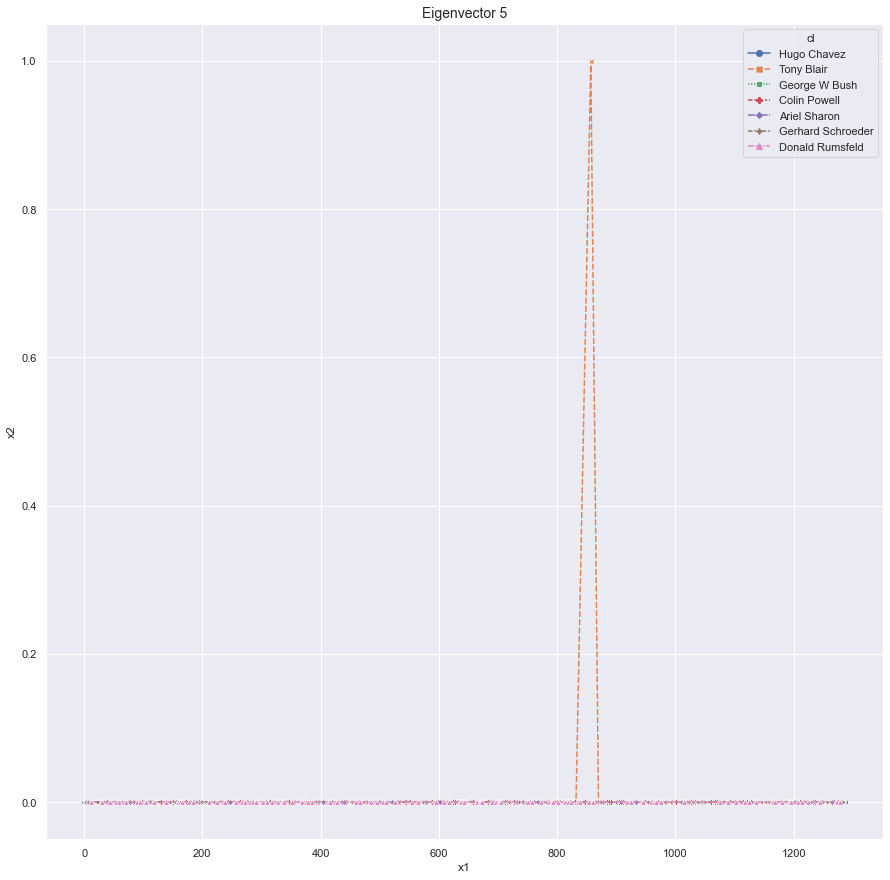

In [61]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,6],cl=target_names[y]))
plt.title('Eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

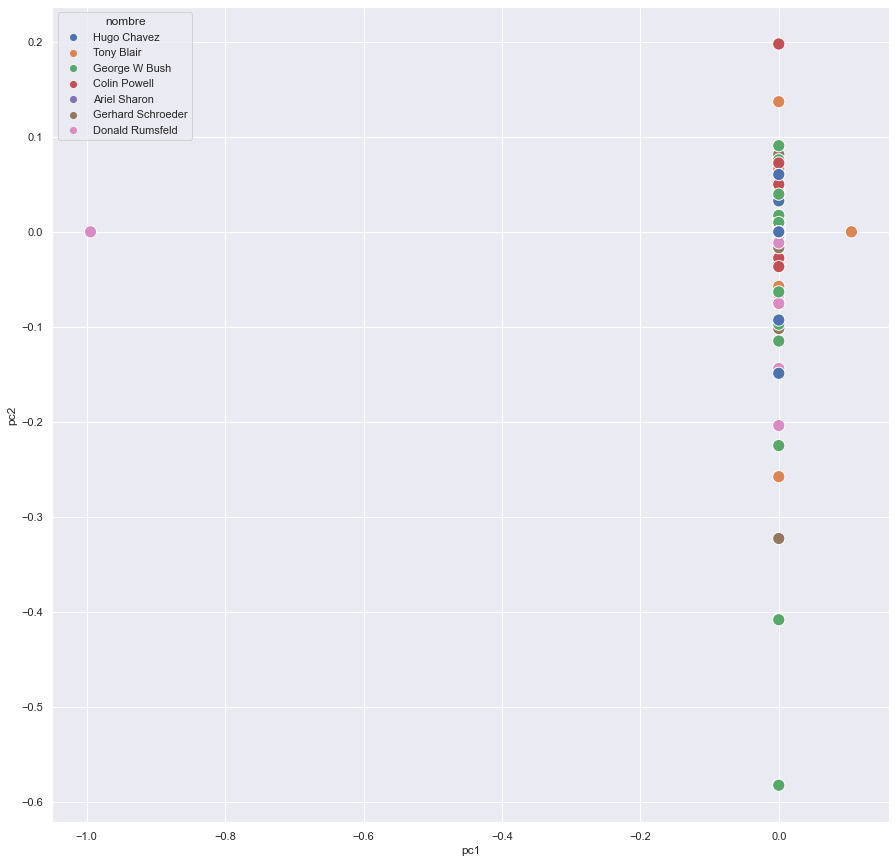

In [21]:
# Representamos en dos dimensiones los datos 
repre_2d = pd.DataFrame({'pc1': vecs[:,5], 'pc2': vecs[:,4], 'nombre':target_names[y]})
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
sns.scatterplot(x='pc1', y='pc2', data = repre_2d, hue='nombre', s=150, legend = 'brief')

In [22]:
# Tomamos nuestros datos sin estandarizar para observar si existe alguna diferencia entre las imagenes
indices, knn_graph = graph(X,knn,mutual=False)#X
W = adjacency_matrix(X, knn_graph, sigma, True)#X
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)

<AxesSubplot:title={'center':'eigenvector 5'}, xlabel='x1', ylabel='x2'>

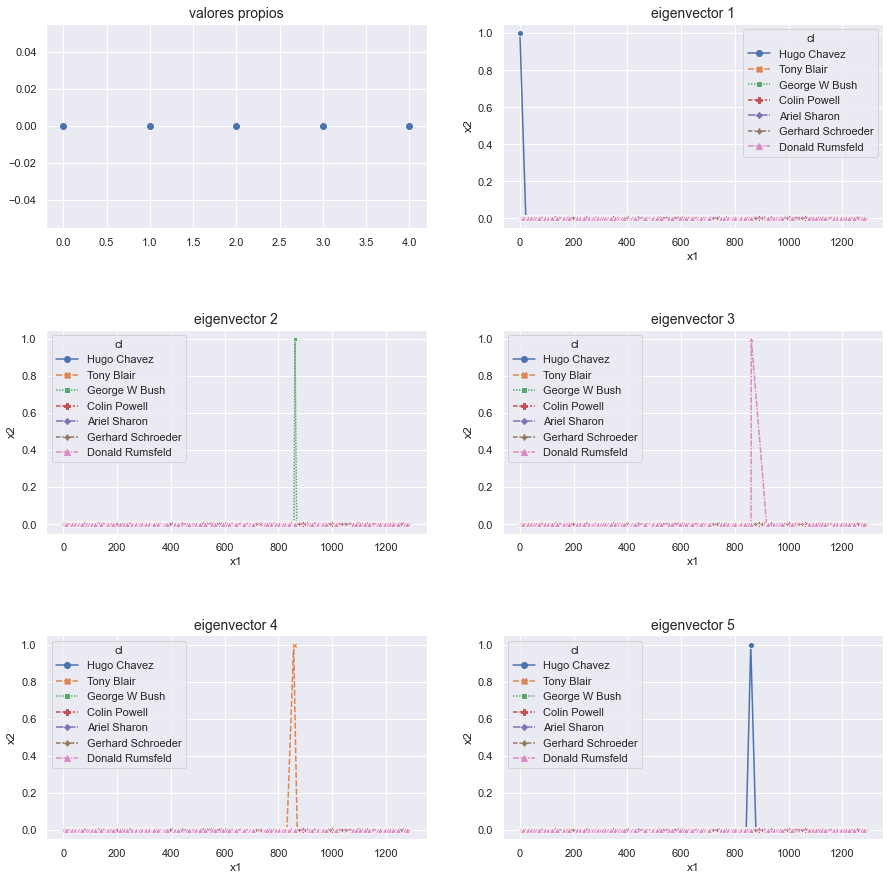

In [23]:
nv = 5
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)

fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),np.round(vals[:nv]))
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=target_names[y]))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=target_names[y]))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=target_names[y]))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,6],cl=target_names[y]))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=target_names[y]))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

Se observa que al estandarizar los datos nuestras representaciones en los valores propios de la matriz que guardan las distancias entre las fotos, son buenas ya que ayudan a separar un poco los datos 

### Intentamos de nuevo hacerlo con otro laplaciano

In [61]:
knn = 5 # k-vecinos cercanos para la construcción del grafo
sigma = 3 # sigma del Kernel Gaussiano 1.8 si funciona 
lflag = 'rw' # Tipo de Laplaciano 
kclust = 7
# funciona 1.8, 5 vecinos y un laplaciano simetrico


indices, knn_graph = graph(X,knn,mutual=False)#X
W = adjacency_matrix(X, knn_graph, sigma, True)#X
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)

<AxesSubplot:title={'center':'eigenvector 9'}, xlabel='x1', ylabel='x2'>

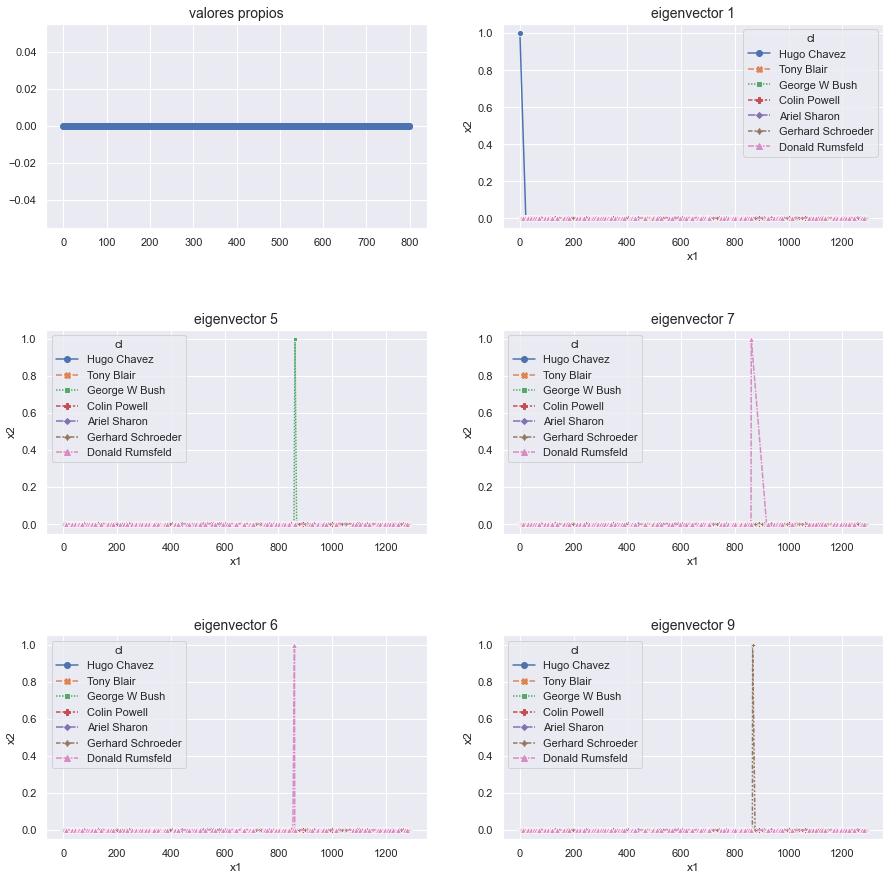

In [62]:
nv = 800
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)

fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),np.round(vals[:nv]))
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=target_names[y]))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=target_names[y]))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=target_names[y]))
plt.title('eigenvector 7', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=target_names[y]))
plt.title('eigenvector 6', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,20],cl=target_names[y]))
plt.title('eigenvector 9', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)


Al ocupar un laplaciano simétrico vemos que los valores propios tercero y sexto nos ayudan a separar mejor los valores

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

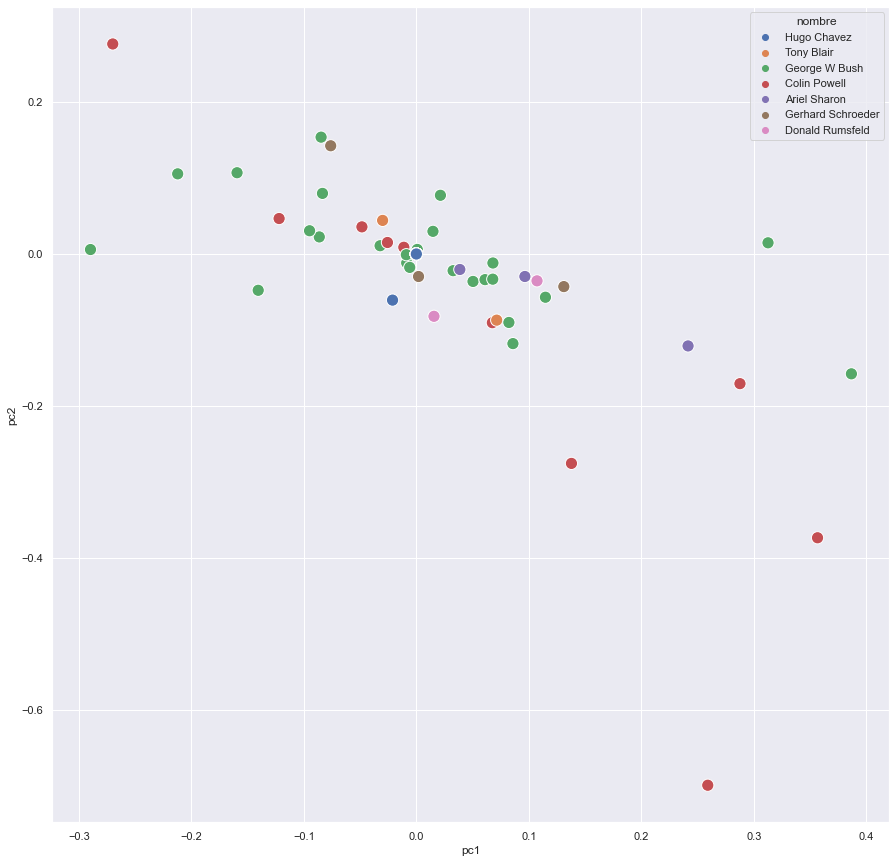

In [38]:
repre_2d = pd.DataFrame({'pc1': vecs[:,7], 'pc2': vecs[:,6], 'nombre':target_names[y]}) # 2 y 6
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
sns.scatterplot(x='pc1', y='pc2', data = repre_2d, hue='nombre', s=150, legend = 'brief')

### Intentamos con PCA reducir la dimensión

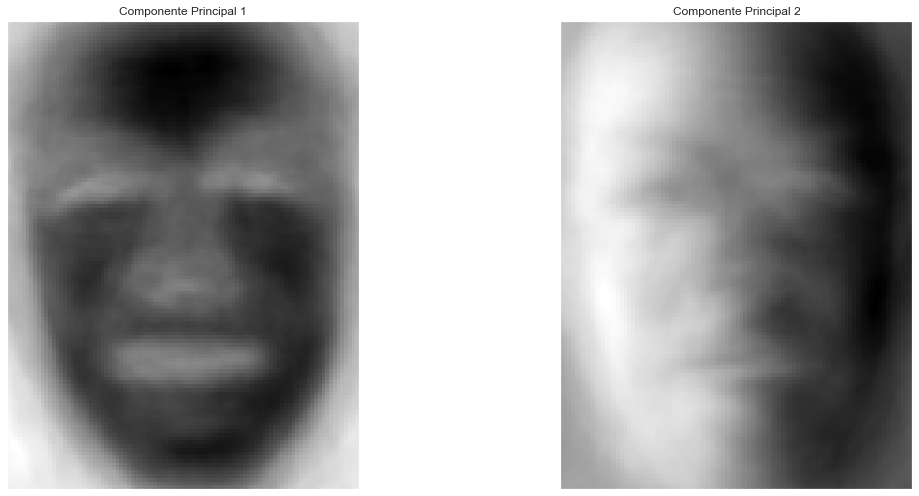

In [87]:
n_comp = 150 # numero de componentes
faces_pca = PCA(n_comp)
faces_proj = faces_pca.fit_transform(faces_scale) #vamos a poner X
eigenfaces = faces_pca.components_.reshape((n_comp, 125, 94))
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1.3,hspace=0.05,wspace=0.05) 
# Graficamos los primeros 10 componentes
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1, xticks=[], yticks=[], title = 'Componente Principal '+str(i+1))
    #ax.imshow(faces_pca.components_[i].reshape(lfw_people.images[0].shape),cmap=plt.cm.gray)
    ax.imshow(np.reshape(faces_pca.components_[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')

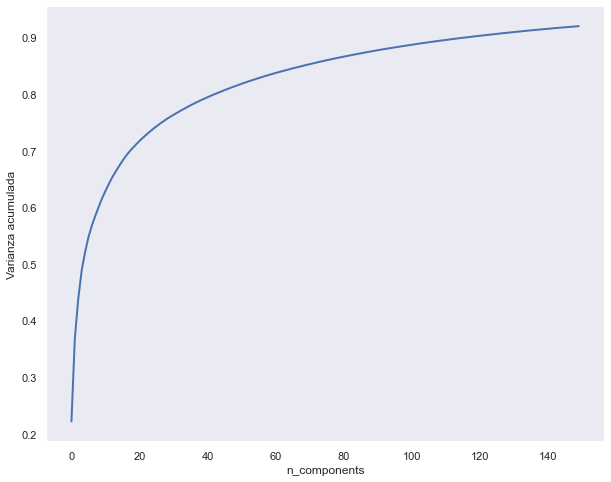

In [88]:
#hacemos la varianza explicada para poder ver cuantas componentes tomar 
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(faces_pca.explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('Varianza acumulada')
plt.show()

In [89]:
nuevos_datos = faces_proj
nuevos_datos.shape

(1288, 150)

In [92]:
knn = 4 # k-vecinos cercanos para la construcción del grafo
sigma = 1.8
9# sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano
kclust = 7

indices, knn_graph = graph(nuevos_datos,knn,mutual=False)#X
W = adjacency_matrix(nuevos_datos, knn_graph, sigma, True)#X
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)

<AxesSubplot:title={'center':'eigenvector 5'}, xlabel='x1', ylabel='x2'>

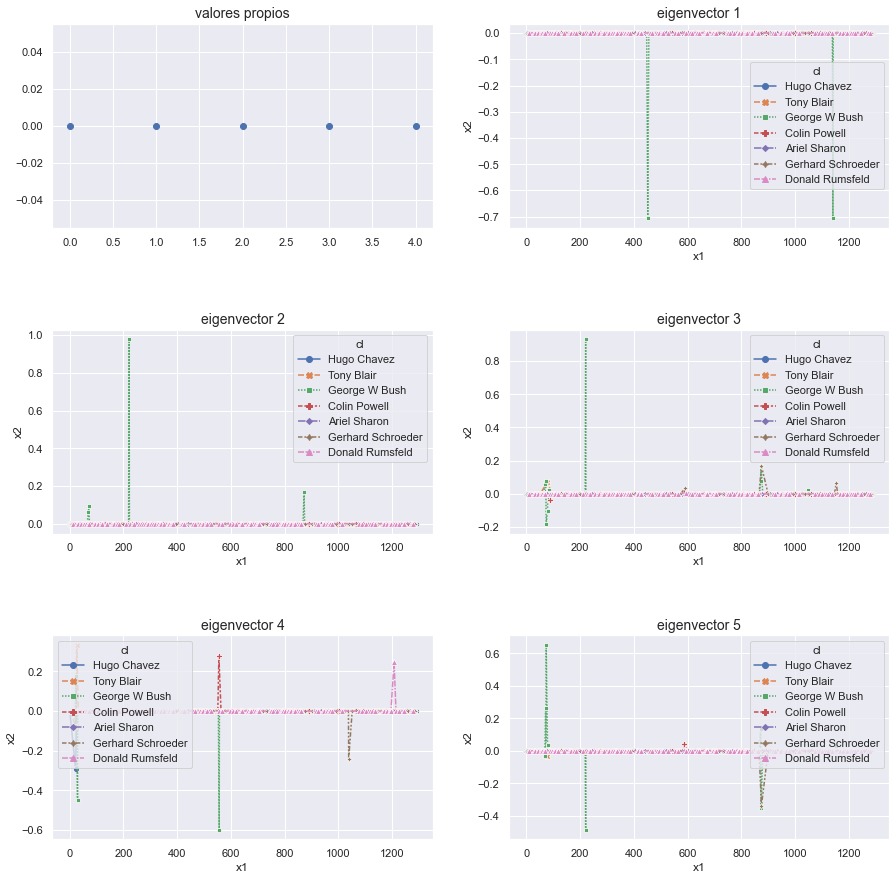

In [93]:
nv = 5
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)

fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),np.round(vals[:nv]))
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=target_names[y]))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=target_names[y]))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=target_names[y]))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=target_names[y]))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=target_names[y]))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

#ax.get_legend().set_visible(False)

<AxesSubplot:title={'center':'eigenvector 5'}, xlabel='x1', ylabel='x2'>

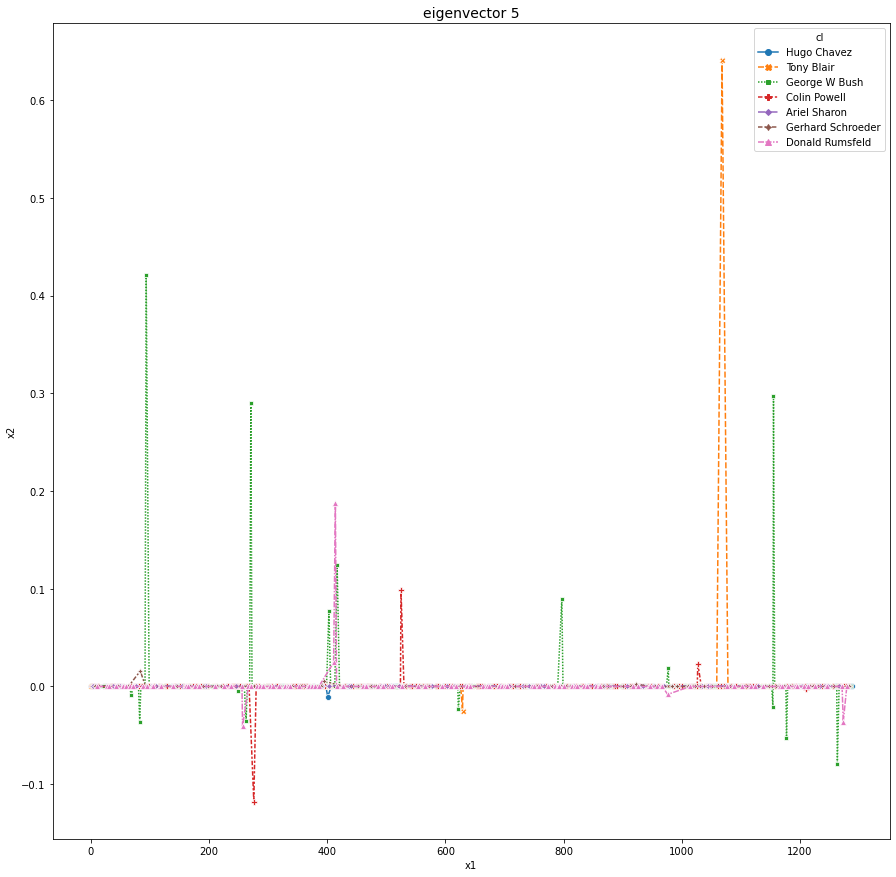

In [38]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=target_names[y]))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

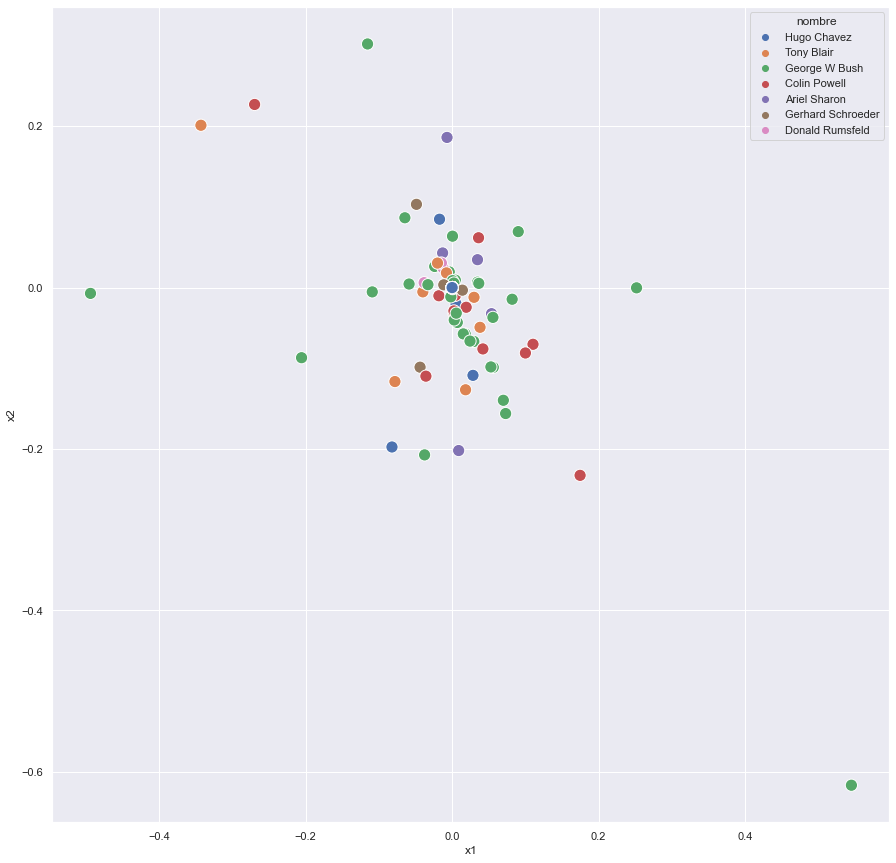

In [48]:
datos_pca_modif = pd.DataFrame({'x1': vecs[:,3], 'x2': vecs[:,4], 'nombre':target_names[y]})
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
#sns.lineplot(x='pc1', y='pc2', data = tsne_dataset, hue='nombre', legend = 'brief',
#               style = 'nombre', markers = True)

sns.scatterplot(x='x1', y='x2', data = datos_pca_modif, hue='nombre', s=150, legend = 'brief')


In [52]:
datos_pca_modif

,x1,x2,nombre
0,0.000000e+00,0.000000e+00,Hugo Chavez
1,0.000000e+00,0.000000e+00,Tony Blair
2,0.000000e+00,0.000000e+00,George W Bush
3,0.000000e+00,0.000000e+00,Colin Powell
4,0.000000e+00,0.000000e+00,Ariel Sharon
...,...,...,...
1283,0.000000e+00,0.000000e+00,Gerhard Schroeder
1284,0.000000e+00,0.000000e+00,Hugo Chavez
1285,0.000000e+00,0.000000e+00,Hugo Chavez
1286,2.835960e-19,8.768282e-20,George W Bush


In [44]:
vecs[:,2].shape

(1288,)

### T-SNE

In [26]:
from sklearn.manifold import TSNE

np.random.seed(0)
tsne = TSNE(perplexity=10)
X_tsne = tsne.fit_transform(X)#X-faces_scale

In [27]:
tsne_dataset = pd.DataFrame({'x1': X_tsne[:, 0], 'x2': X_tsne[:, 1], 'nombre':target_names[y]})

<AxesSubplot:xlabel='x1', ylabel='x2'>

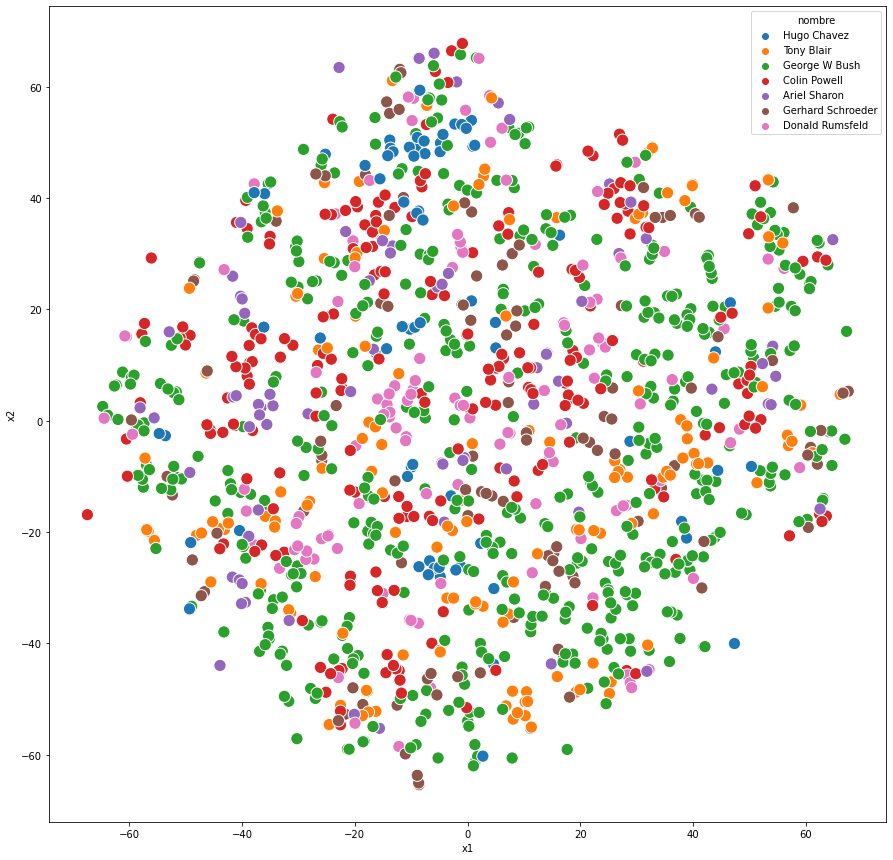

In [28]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
#sns.lineplot(x='pc1', y='pc2', data = tsne_dataset, hue='nombre', legend = 'brief',
#               style = 'nombre', markers = True)

sns.scatterplot(x='x1', y='x2', data = tsne_dataset, hue='nombre', s=150, legend = 'brief')

Agregamos una parte extra weyyy

In [95]:
tsne_dataset

,x1,x2,nombre
0,-97.651390,-79.831718,Hugo Chavez
1,-10.987042,-3.928022,Tony Blair
2,-97.651390,-79.831718,George W Bush
3,161.051605,-18.433619,Colin Powell
4,-10.987042,-3.928022,Ariel Sharon
...,...,...,...
1283,63.821194,80.661873,Gerhard Schroeder
1284,-10.987042,-3.928022,Hugo Chavez
1285,-10.987042,-3.928022,Hugo Chavez
1286,-36.431992,71.976273,George W Bush


In [9]:
from sklearn.manifold import SpectralEmbedding
scaler = StandardScaler(with_mean=True,with_std=True)
p = scaler.fit_transform(X)

knn = 4 # k-vecinos cercanos para la construcción del grafo
sigma = 2.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano

In [29]:
spemd = SpectralEmbedding(n_components=3, affinity='nearest_neighbors', n_neighbors=knn)
faces = spemd.fit_transform(p)

<AxesSubplot:xlabel='componente1', ylabel='componente2'>

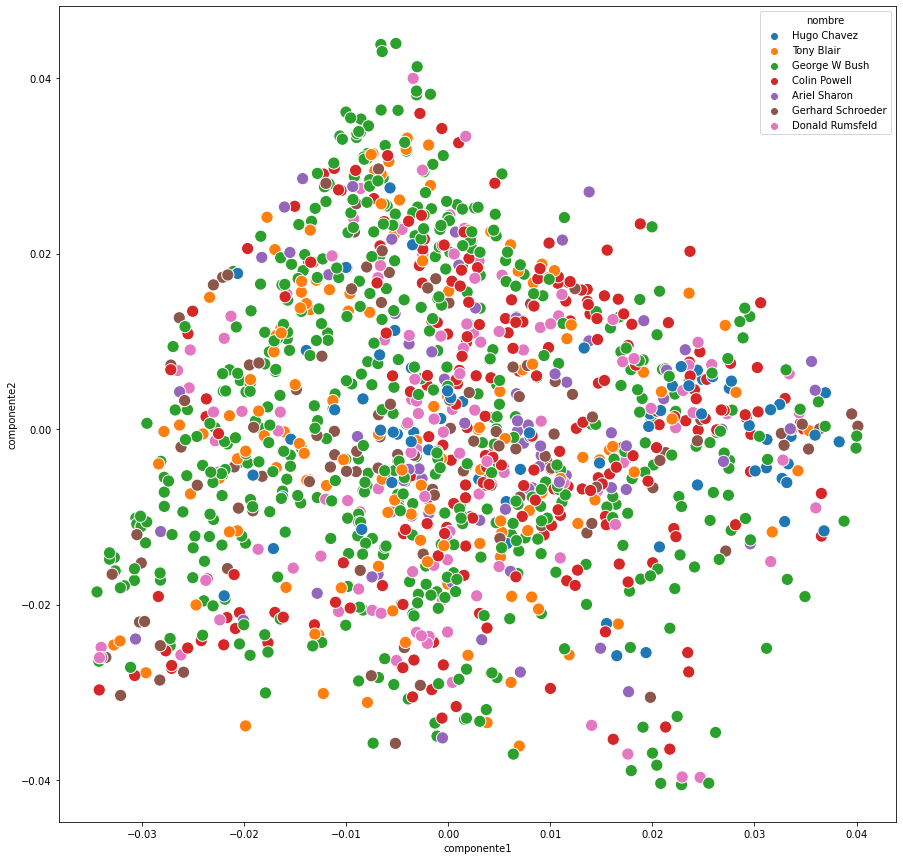

In [31]:
repre_2d = pd.DataFrame({'componente1':faces[:,0], 'componente2':faces[:,1],'componente3':faces[:,2], 'nombre':target_names[y]})
fig = plt.figure(figsize=(15,15))
sns.scatterplot(x='componente1', y='componente2', data = repre_2d, hue='nombre', s=150, legend = 'brief')
